In [1]:
!pip install transformers
!pip install torch
!pip install pillow
!pip install matplotlib
!pip install requests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-

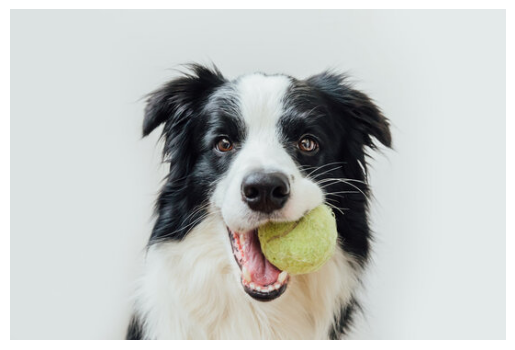


Top 4 Generated Captions:
1: black white white black white with tennis in mouth a
2: black white white black white with tennis in mouth
3: black white black white brown white with tennis in mouth
4: black white black white brown white with tennis in mouth a


['black white white black white with tennis in mouth a',
 'black white white black white with tennis in mouth',
 'black white black white brown white with tennis in mouth',
 'black white black white brown white with tennis in mouth a']

In [4]:
from transformers import VisionEncoderDecoderModel, BartTokenizer, ViTImageProcessor
from PIL import Image
import torch
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load model and components
path = "/kaggle/input/vit-bart/vit_bart_captioning_model"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VisionEncoderDecoderModel.from_pretrained(path).to(device)
tokenizer = BartTokenizer.from_pretrained(path)
feature_extractor = ViTImageProcessor.from_pretrained(path)

# Set decoding parameters
model.config.decoder_start_token_id = tokenizer.bos_token_id
model.config.eos_token_id = tokenizer.eos_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.generation_config.max_length = 128
model.generation_config.num_beams = 4  # total beams
model.generation_config.num_return_sequences = 4  # return top 4 captions

# Main function
def caption_from_url(image_url):
    response = requests.get(image_url)
    content_type = response.headers.get('content-type')
    
    if 'image' not in content_type:
        print("The URL does not point to an image.")
        return None
    
    image = Image.open(BytesIO(response.content)).convert("RGB")
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values.to(device)
    with torch.no_grad():
        output_ids = model.generate(pixel_values, 
                                    num_beams=4, 
                                    num_return_sequences=4, 
                                    early_stopping=True)
    
    captions = [tokenizer.decode(output, skip_special_tokens=True).strip() for output in output_ids]
    
    print("\nTop 4 Generated Captions:")
    for i, cap in enumerate(captions, 1):
        print(f"{i}: {cap}")
    
    return captions

# Example usage:
url = "https://t3.ftcdn.net/jpg/03/97/85/26/360_F_397852696_w7AQUQxGjDS6xdSq8ZWtGB2CbVbf5gVr.jpg"
caption_from_url(url)


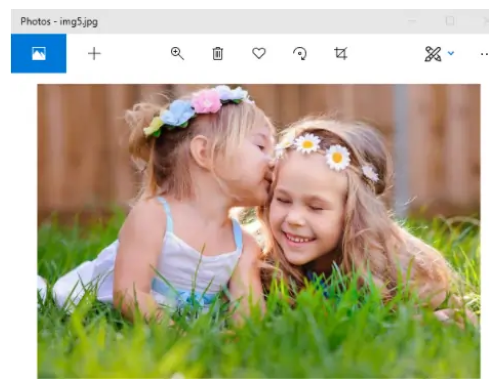


Top 4 Generated Captions:
1: girls in playing a with . .
2: girls in playing the . .
3: girls in playing the .
4: girls in playing a with .


['girls in playing a with . .',
 'girls in playing the . .',
 'girls in playing the .',
 'girls in playing a with .']

In [5]:
path="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/43630Screenshot-92.webp"
caption_from_url(path)

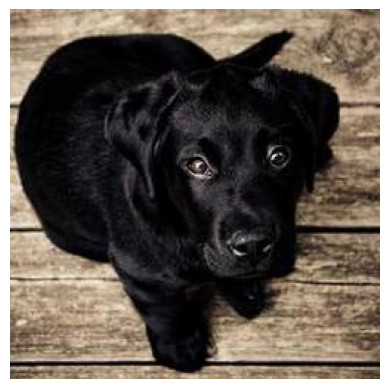


Top 4 Generated Captions:
1: black running wooden .
2: black running wooden
3: black running a .
4: black running a wooden


['black running wooden .',
 'black running wooden',
 'black running a .',
 'black running a wooden']

In [6]:
path="https://picsum.photos/id/237/250"
caption_from_url(path)

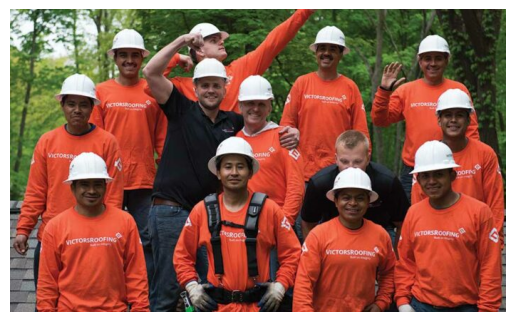


Top 4 Generated Captions:
1: group people orange white wearing hats orange .
2: group people orange white wearing hats orange are .
3: group people orange white wearing hats
4: group men orange white wearing hats orange are .


['group people orange white wearing hats orange .',
 'group people orange white wearing hats orange are .',
 'group people orange white wearing hats',
 'group men orange white wearing hats orange are .']

In [9]:
path="https://www.roofingcontractor.com/ext/resources/Issues/2017/March/VictorsRoofing-244.jpg?t=1489601060&width=696"
caption_from_url(path)

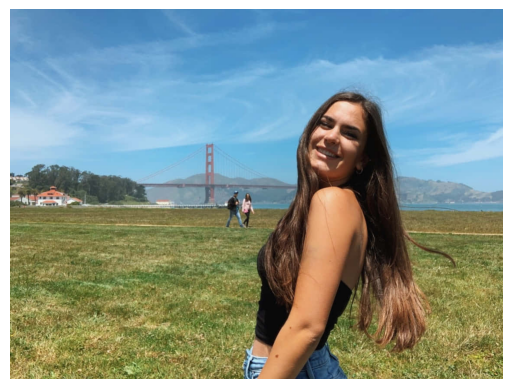


Top 4 Generated Captions:
1: young in field a with in background
2: woman longhaired in field
3: woman longhaired in field a .
4: woman in field a . .


['young in field a with in background',
 'woman longhaired in field',
 'woman longhaired in field a .',
 'woman in field a . .']

In [11]:
path="https://wallpapers.com/images/hd/beautiful-woman-with-random-people-in-background-roumbpovzh5jzxj5.jpg"
caption_from_url(path)


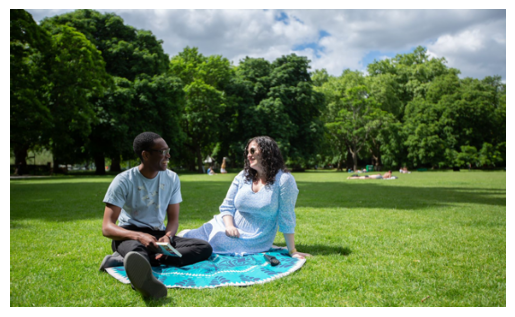


Top 4 Generated Captions:
1: people in park a
2: young sitting a in park a
3: young and sitting a in park a
4: people in park a .


['people in park a',
 'young sitting a in park a',
 'young and sitting a in park a',
 'people in park a .']

In [12]:
path="https://solihullobserver.co.uk/wp-content/uploads/2022/07/PARKS-1.png"
caption_from_url(path)


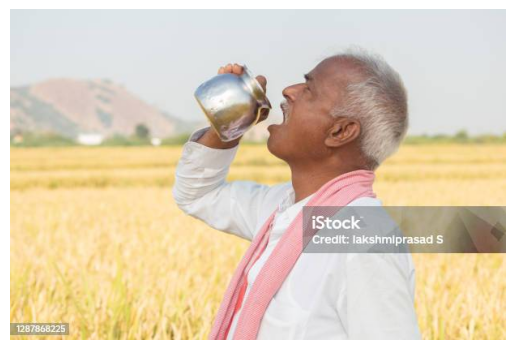


Top 4 Generated Captions:
1: man a in field a holding bottle water
2: man a holding bottle water a in field
3: man a holding bottle a in field
4: man a in field a holding bottle


['man a in field a holding bottle water',
 'man a holding bottle water a in field',
 'man a holding bottle a in field',
 'man a in field a holding bottle']

In [13]:
path= "https://media.istockphoto.com/id/1287868225/photo/thirsty-indian-farmer-drinking-water-from-steel-tumbler-or-chambu-on-hot-sunny-day-at.jpg?s=612x612&w=is&k=20&c=tB2jhvPwAGG7rYjZofb-oj3G213IRei4Fjh3nVMpuGA="
caption_from_url(path)

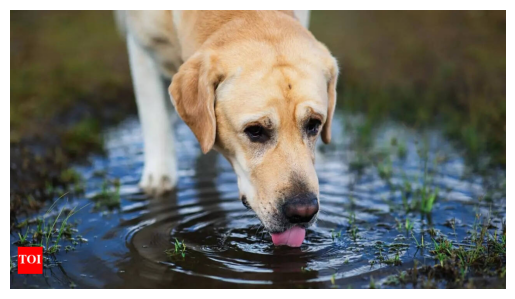


Top 4 Generated Captions:
1: dog water auddle water
2: yellow walking water auddle water
3: dog water auddle water .
4: dog water auddle water water


['dog water auddle water',
 'yellow walking water auddle water',
 'dog water auddle water .',
 'dog water auddle water water']

In [15]:
path="https://static.toiimg.com/thumb/msid-119795381,width-1280,height-720,imgsize-62310,resizemode-6,overlay-toi_sw,pt-32,y_pad-40/photo.jpg"
caption_from_url(path)

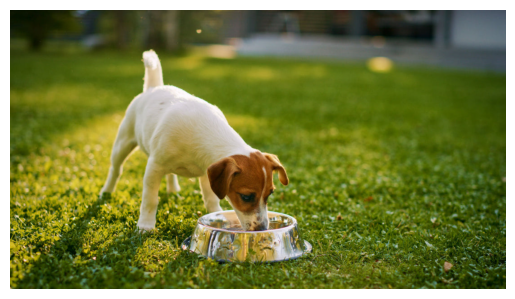


Top 4 Generated Captions:
1: white brown white is on grass a and dog a of drinking .
2: white brown is on grass a and dog a of in mouth
3: white brown white is on grass a and dog a of drinking
4: white brown white is on grass a and dog to a of .


['white brown white is on grass a and dog a of drinking .',
 'white brown is on grass a and dog a of in mouth',
 'white brown white is on grass a and dog a of drinking',
 'white brown white is on grass a and dog to a of .']

In [16]:
path="https://openfarmpet.com/cdn/shop/articles/Dog_drinking_water_3ad0ebfc-3eb1-463f-955f-55400144ec25.jpg?v=1739369749&width=1100"
caption_from_url(path)

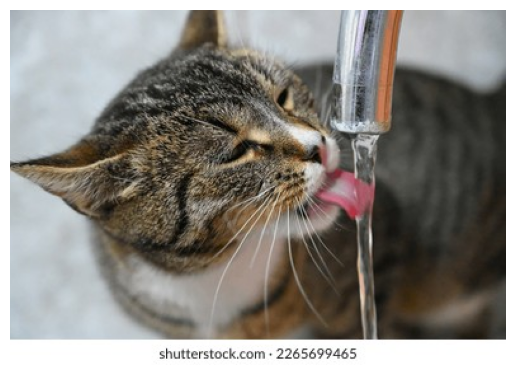


Top 4 Generated Captions:
1: cat its in water a .
2: cat its in water a . .
3: cat its in water
4: cat its on of water a .


['cat its in water a .',
 'cat its in water a . .',
 'cat its in water',
 'cat its on of water a .']

In [19]:
path="https://www.shutterstock.com/image-photo/sweet-cat-drinking-water-tap-260nw-2265699465.jpg"
caption_from_url(path)

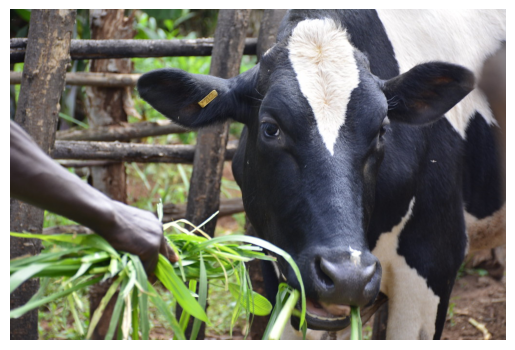


Top 4 Generated Captions:
1: cow cow cow fence fence fence a . .
2: cow cow cow fence fence fence a .
3: cow cow cow fence fence fence a in background
4: cow cow cow fence fence fence


['cow cow cow fence fence fence a . .',
 'cow cow cow fence fence fence a .',
 'cow cow cow fence fence fence a in background',
 'cow cow cow fence fence fence']

In [20]:
path="https://live.staticflickr.com/5620/22366075685_8a11ec0020_b.jpg"
caption_from_url(path)

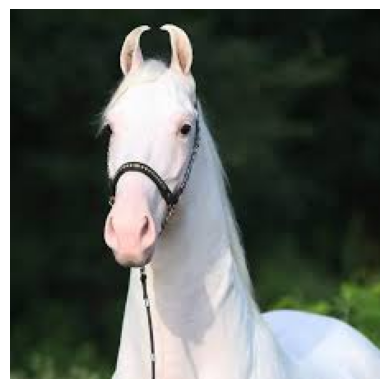


Top 4 Generated Captions:
1: white wearing black white is a and horse its .
2: white wearing black white is a and dog its .
3: white wearing black white is a and dog its around
4: white is white with black on


['white wearing black white is a and horse its .',
 'white wearing black white is a and dog its .',
 'white wearing black white is a and dog its around',
 'white is white with black on']

In [21]:
path="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdPHDrzwR_I4Y--a_i0HN2SN8Mgt7Pkj9ngQ&s"
caption_from_url(path)